In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Data_sets/Raw-GPS-data-Kandy-Buses/preprocessed-data-digana/bus_trip_zone_wise_points_merged_data.csv')
# !ls /content/drive/MyDrive/Data_sets/Raw-GPS-data-Kandy-Buses/preprocessed-data-digana/bus_trip_zone_wise_points_merged_data.csv

In [45]:
df

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,zone
0,574733098,116,2021-10-16 08:03:04,7.293092,80.635573,9.17927,2021-10-16,08:03:04,POINT (184746.41595346577 232322.7596044842),BT01,2.0,1,100.0
1,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,100.5
2,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,100.5
3,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,100.5
4,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,100.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094732,1549812955,1377,2022-11-01 18:31:55,7.290382,80.638812,10.79910,2022-11-01,18:31:55,POINT (185103.88509572603 232022.97465176738),NaN,14982.0,2,213.5
4094733,1549812956,1377,2022-11-01 18:32:10,7.290812,80.638093,11.87910,2022-11-01,18:32:10,POINT (185024.58749601987 232070.54850351534),NaN,14982.0,2,213.5
4094734,1549812957,1377,2022-11-01 18:32:25,7.291148,80.637472,9.71923,2022-11-01,18:32:25,POINT (184955.95312516575 232107.80197129864),NaN,14982.0,2,213.5
4094735,1549812958,1377,2022-11-01 18:32:40,7.291362,80.636612,17.81860,2022-11-01,18:32:40,POINT (184861.00274888708 232131.41752982777),NaN,14982.0,2,213.5


In [30]:
# # df = df[(df['zone']%1 == 0.5) & (df['zone'] < 116)]
# df = df[(df['deviceid']!=209) & (df['deviceid'] != 550)]
df = df[df['speed']>0]

mean_speed = df.groupby(["deviceid","zone"])['speed'].mean().reset_index()

In [32]:
df["deviceid"].unique()

array([ 116,  117,  123,  128,  262,  264,  274,  279,  294,  505,  513,
       1143, 1358, 1377,  250, 1410,  550,  121, 1409,  209,  275, 1408,
       1718, 1719, 1166,  284])

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have already created the 'result' DataFrame and 'df' DataFrame
def elbow_method(result,zone):
  # Select the features for clustering
  X = result[zone]

  # Standardize the data (important for K-Means)
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Initialize lists to store inertia values for different k
  inertia_values = []

  # Determine a range of k values to test (e.g., from 1 to 10 clusters)
  k_values = range(1, 11)

  # Calculate inertia for each k value
  for k in k_values:
      kmeans = KMeans(n_init=10,n_clusters=k, random_state=0)
      kmeans.fit(X_scaled)
      inertia_values.append(kmeans.inertia_)

  # Plot the elbow graph
  plt.plot(k_values, inertia_values, marker='o', linestyle='-')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method for Optimal k')
  plt.grid(True)
  plt.show()

Clustering based on all data

In [ ]:
from google.colab import files

zones = mean_speed["zone"].unique()
deviceid_list = mean_speed["deviceid"].unique()
print(zones.tolist())

data = {
    'deviceid': []
}
for ele in zones:
  name = "zone_"+str(ele)
  data[name]=[]

for id in deviceid_list:
  data['deviceid'].append(id)
  for zone in zones:
    data['zone_'+str(zone)].append(mean_speed[(mean_speed["deviceid"] == id) & (mean_speed["zone"] == zone)]["speed"].values[0])

final_df = pd.DataFrame(data)


def download_csv(data,filename):
  filename= filename + '.csv'
  data.to_csv(filename, encoding = 'utf-8-sig',index= False)
  files.download(filename)

# download_csv(final_df,"clustering_zones")

[100.0, 100.5, 101.0, 101.5, 102.0, 102.5, 103.0, 103.5, 104.0, 104.5, 105.0, 105.5, 106.0, 106.5, 107.0, 107.5, 108.0, 108.5, 109.0, 109.5, 110.0, 110.5, 111.0, 111.5, 112.0, 112.5, 113.0, 113.5, 114.0, 114.5, 115.0, 200.0, 200.5, 201.0, 201.5, 202.0, 202.5, 203.0, 203.5, 204.0, 204.5, 205.0, 205.5, 206.0, 206.5, 207.0, 207.5, 208.0, 208.5, 209.0, 209.5, 210.0, 210.5, 211.0, 211.5, 212.0, 212.5, 213.0, 213.5, 214.0]


In [27]:
len(deviceid_list)

24

In [23]:
final_df

,deviceid,zone_100.0,zone_100.5,zone_101.0,zone_101.5,zone_102.0,zone_102.5,zone_103.0,zone_103.5,zone_104.0,...,zone_209.5,zone_210.0,zone_210.5,zone_211.0,zone_211.5,zone_212.0,zone_212.5,zone_213.0,zone_213.5,zone_214.0
0,116,5.876841,7.968686,6.279189,7.871319,9.125657,9.733167,10.841018,13.603453,12.643760,...,12.094559,10.881864,13.810414,10.467454,11.245313,9.930098,9.555425,11.727995,11.136950,6.064132
1,117,6.627192,7.219236,5.365944,7.497184,8.008839,8.133124,8.310644,12.176575,12.734179,...,10.681801,9.083114,12.023438,8.456340,9.824298,7.282622,9.488611,10.369049,10.161885,5.529385
2,121,6.719996,10.763931,6.237597,9.245045,9.170773,9.475796,8.927963,12.562325,13.125051,...,11.552505,8.755612,11.889856,9.859218,10.211660,8.078714,10.404200,10.916620,10.617204,6.214201
3,123,5.605495,10.292127,5.942453,8.064331,8.654489,9.386490,9.083364,12.637105,12.125428,...,11.204543,9.084111,12.257429,9.235838,10.396026,8.029017,9.473742,10.827590,13.233097,7.229089
4,128,5.068436,6.834615,5.828953,7.569157,8.488295,8.989998,8.795503,11.898162,11.132382,...,10.994156,9.234029,11.886945,8.763531,10.081295,7.871131,8.842800,10.729660,12.319239,6.032689
5,250,5.874396,7.258912,5.866630,7.616981,8.787666,8.849108,8.967777,12.316440,12.275573,...,11.433941,8.978174,11.496083,9.134699,10.267341,7.608269,8.778722,10.461288,9.918356,5.877119
6,262,6.333708,7.659357,5.983451,7.894739,8.652452,8.859285,8.681858,12.310701,12.233869,...,11.166710,9.118220,11.794470,9.197627,10.819500,8.215457,9.841695,11.479721,10.604079,6.146318
7,264,6.045169,7.338869,6.339677,8.801705,8.646602,9.601304,10.047161,13.702058,12.255405,...,12.307820,9.887598,11.963738,10.611509,11.175367,8.586832,9.757099,9.149029,10.147737,6.407879
8,274,6.754861,8.156170,5.877537,7.758491,8.573454,8.749680,8.661811,12.355898,12.227243,...,11.565385,9.596403,13.046925,9.532637,10.659576,8.626741,9.869771,11.221184,11.633621,7.733259
9,275,5.679189,7.602349,5.973929,9.367951,8.720104,9.101621,8.873542,12.230337,12.332126,...,11.115441,8.662158,10.982958,9.618435,10.380702,7.505402,10.004545,8.810910,10.624843,5.892574


In [34]:
kandy_digana = ['zone_100.5', 'zone_101.5', 'zone_102.5', 'zone_103.5', 'zone_104.5', 'zone_105.5', 'zone_106.5', 'zone_107.5', 'zone_108.5', 'zone_109.5', 'zone_110.5', 'zone_111.5', 'zone_112.5', 'zone_113.5', 'zone_114.5']
digana_kandy = ['zone_200.5', 'zone_201.5', 'zone_202.5', 'zone_203.5', 'zone_204.5', 'zone_205.5', 'zone_206.5', 'zone_207.5', 'zone_208.5', 'zone_209.5', 'zone_210.5', 'zone_211.5', 'zone_212.5', 'zone_213.5']
kandy_digana_remove_driver_id = [505,209]
digana_kandy_remove_driver_id = [505,209,284]
print(final_df["deviceid"].unique())
kandy_digana_final_df = final_df[~final_df['deviceid'].isin(kandy_digana_remove_driver_id)]
print(kandy_digana_final_df["deviceid"].unique())

print("=================================")

print(final_df["deviceid"].unique())
digana_kandy_final_df = final_df[~final_df['deviceid'].isin(digana_kandy_remove_driver_id)]
print(digana_kandy_final_df["deviceid"].unique())

[ 116  117  121  123  128  250  262  264  274  275  279  284  294  505
  513 1143 1166 1358 1377 1408 1409 1410 1718 1719]
[ 116  117  121  123  128  250  262  264  274  275  279  284  294  513
 1143 1166 1358 1377 1408 1409 1410 1718 1719]
[ 116  117  121  123  128  250  262  264  274  275  279  284  294  505
  513 1143 1166 1358 1377 1408 1409 1410 1718 1719]
[ 116  117  121  123  128  250  262  264  274  275  279  294  513 1143
 1166 1358 1377 1408 1409 1410 1718 1719]


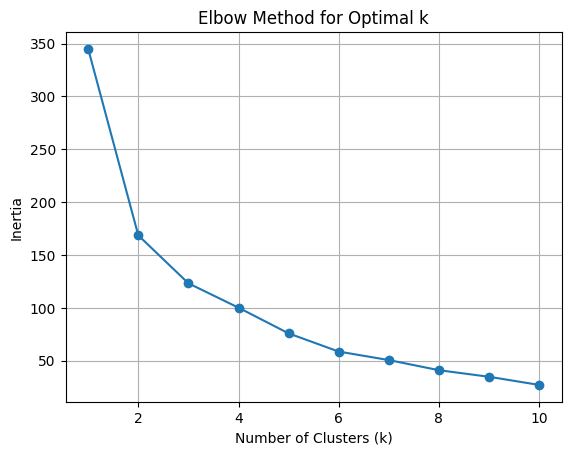

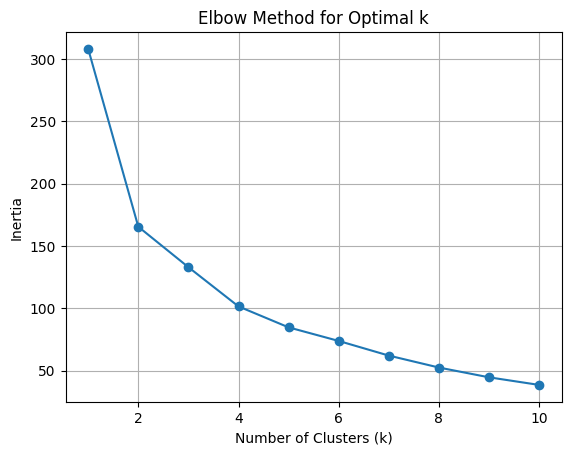

In [36]:
elbow_method(kandy_digana_final_df,kandy_digana)
elbow_method(digana_kandy_final_df,digana_kandy)

In [42]:
def get_clusters(final_df,zone,k):
  final_df_copy = final_df.copy()
  X = final_df_copy[zone]

  # Standardize the data (important for K-Means)
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Perform K-Means clustering
  # k = 2  # You can choose the number of clusters (k) as needed
  kmeans = KMeans(n_init=10,n_clusters=k, random_state=0)
  final_df_copy['cluster'] = kmeans.fit_predict(X_scaled)
  # Define the column name you want to move and its new position
  column_name = 'cluster'
  new_position = 1  # Index where you want to move the column

  # Remove the column from the DataFrame and store it in a variable
  column_to_move = final_df_copy.pop(column_name)

  # Insert the column back into the DataFrame at the new position
  final_df_copy.insert(new_position, column_name, column_to_move)

  return final_df_copy

In [43]:
clusters_digana_kandy = get_clusters(digana_kandy_final_df,digana_kandy,2)
# download_csv(clusters_digana_kandy,"clusters_digana_kandy")
clusters_digana_kandy

,deviceid,cluster,zone_100.0,zone_100.5,zone_101.0,zone_101.5,zone_102.0,zone_102.5,zone_103.0,zone_103.5,...,zone_209.5,zone_210.0,zone_210.5,zone_211.0,zone_211.5,zone_212.0,zone_212.5,zone_213.0,zone_213.5,zone_214.0
0,116,1,5.876841,7.968686,6.279189,7.871319,9.125657,9.733167,10.841018,13.603453,...,12.094559,10.881864,13.810414,10.467454,11.245313,9.930098,9.555425,11.727995,11.136950,6.064132
1,117,0,6.627192,7.219236,5.365944,7.497184,8.008839,8.133124,8.310644,12.176575,...,10.681801,9.083114,12.023438,8.456340,9.824298,7.282622,9.488611,10.369049,10.161885,5.529385
2,121,0,6.719996,10.763931,6.237597,9.245045,9.170773,9.475796,8.927963,12.562325,...,11.552505,8.755612,11.889856,9.859218,10.211660,8.078714,10.404200,10.916620,10.617204,6.214201
3,123,0,5.605495,10.292127,5.942453,8.064331,8.654489,9.386490,9.083364,12.637105,...,11.204543,9.084111,12.257429,9.235838,10.396026,8.029017,9.473742,10.827590,13.233097,7.229089
4,128,0,5.068436,6.834615,5.828953,7.569157,8.488295,8.989998,8.795503,11.898162,...,10.994156,9.234029,11.886945,8.763531,10.081295,7.871131,8.842800,10.729660,12.319239,6.032689
5,250,0,5.874396,7.258912,5.866630,7.616981,8.787666,8.849108,8.967777,12.316440,...,11.433941,8.978174,11.496083,9.134699,10.267341,7.608269,8.778722,10.461288,9.918356,5.877119
6,262,0,6.333708,7.659357,5.983451,7.894739,8.652452,8.859285,8.681858,12.310701,...,11.166710,9.118220,11.794470,9.197627,10.819500,8.215457,9.841695,11.479721,10.604079,6.146318
7,264,1,6.045169,7.338869,6.339677,8.801705,8.646602,9.601304,10.047161,13.702058,...,12.307820,9.887598,11.963738,10.611509,11.175367,8.586832,9.757099,9.149029,10.147737,6.407879
8,274,0,6.754861,8.156170,5.877537,7.758491,8.573454,8.749680,8.661811,12.355898,...,11.565385,9.596403,13.046925,9.532637,10.659576,8.626741,9.869771,11.221184,11.633621,7.733259
9,275,0,5.679189,7.602349,5.973929,9.367951,8.720104,9.101621,8.873542,12.230337,...,11.115441,8.662158,10.982958,9.618435,10.380702,7.505402,10.004545,8.810910,10.624843,5.892574


In [44]:
clusters_kandy_digana = get_clusters(kandy_digana_final_df,kandy_digana,2)
clusters_kandy_digana
# download_csv(clusters_digana_kandy,"clusters_digana_kandy")

,deviceid,cluster,zone_100.0,zone_100.5,zone_101.0,zone_101.5,zone_102.0,zone_102.5,zone_103.0,zone_103.5,...,zone_209.5,zone_210.0,zone_210.5,zone_211.0,zone_211.5,zone_212.0,zone_212.5,zone_213.0,zone_213.5,zone_214.0
0,116,1,5.876841,7.968686,6.279189,7.871319,9.125657,9.733167,10.841018,13.603453,...,12.094559,10.881864,13.810414,10.467454,11.245313,9.930098,9.555425,11.727995,11.136950,6.064132
1,117,0,6.627192,7.219236,5.365944,7.497184,8.008839,8.133124,8.310644,12.176575,...,10.681801,9.083114,12.023438,8.456340,9.824298,7.282622,9.488611,10.369049,10.161885,5.529385
2,121,0,6.719996,10.763931,6.237597,9.245045,9.170773,9.475796,8.927963,12.562325,...,11.552505,8.755612,11.889856,9.859218,10.211660,8.078714,10.404200,10.916620,10.617204,6.214201
3,123,0,5.605495,10.292127,5.942453,8.064331,8.654489,9.386490,9.083364,12.637105,...,11.204543,9.084111,12.257429,9.235838,10.396026,8.029017,9.473742,10.827590,13.233097,7.229089
4,128,0,5.068436,6.834615,5.828953,7.569157,8.488295,8.989998,8.795503,11.898162,...,10.994156,9.234029,11.886945,8.763531,10.081295,7.871131,8.842800,10.729660,12.319239,6.032689
5,250,0,5.874396,7.258912,5.866630,7.616981,8.787666,8.849108,8.967777,12.316440,...,11.433941,8.978174,11.496083,9.134699,10.267341,7.608269,8.778722,10.461288,9.918356,5.877119
6,262,0,6.333708,7.659357,5.983451,7.894739,8.652452,8.859285,8.681858,12.310701,...,11.166710,9.118220,11.794470,9.197627,10.819500,8.215457,9.841695,11.479721,10.604079,6.146318
7,264,1,6.045169,7.338869,6.339677,8.801705,8.646602,9.601304,10.047161,13.702058,...,12.307820,9.887598,11.963738,10.611509,11.175367,8.586832,9.757099,9.149029,10.147737,6.407879
8,274,0,6.754861,8.156170,5.877537,7.758491,8.573454,8.749680,8.661811,12.355898,...,11.565385,9.596403,13.046925,9.532637,10.659576,8.626741,9.869771,11.221184,11.633621,7.733259
9,275,0,5.679189,7.602349,5.973929,9.367951,8.720104,9.101621,8.873542,12.230337,...,11.115441,8.662158,10.982958,9.618435,10.380702,7.505402,10.004545,8.810910,10.624843,5.892574
